In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
coord_paris = pd.read_csv('coordinates_paris.csv')
coord_toulouse = pd.read_csv('coordinates_toulouse.csv')
xhour_paris = pd.read_csv('X_hour_paris.csv')
xhour_toulouse = pd.read_csv('X_hour_toulouse.csv')
distance_paris = pd.read_csv('distance_paris.csv')
distance_toulouse = pd.read_csv('distance_toulouse.csv')

In [4]:
coord_paris = coord_paris.rename(columns={
    'Unnamed: 0': 'nom_station',
})
coord_toulouse = coord_toulouse.rename(columns={
    'Unnamed: 0': 'nom_station',
})
xhour_paris = xhour_paris.rename(columns={
    'Unnamed: 0': 'Heures',
})
xhour_toulouse = xhour_toulouse.rename(columns={
    'Unnamed: 0': 'Heures',
})

In [5]:
xhour_paris_long = xhour_paris.melt(id_vars=['Heures'], var_name='nom_station', value_name='taux_remplissage')
xhour_toulouse_long = xhour_toulouse.melt(id_vars=['Heures'], var_name='nom_station', value_name='taux_remplissage')


In [6]:
data_paris = pd.merge(xhour_paris_long, coord_paris, on='nom_station')
data_toulouse = pd.merge(xhour_toulouse_long, coord_toulouse, on='nom_station')

In [7]:
data_paris['jour'] = data_paris['Heures'] // 24 + 1
data_paris['semaine'] = data_paris['jour'] // 7 + 1 
data_paris['mois'] = data_paris['jour'] // 30 + 1

In [8]:
data_paris['jour'] = data_paris['jour'] % 7
data_paris['jour'] = data_paris['jour'].replace(0, 7)

In [9]:
data_paris.head()

,Heures,nom_station,taux_remplissage,latitude,longitude,jour,semaine,mois
0,1,00906-gare-de-lest,0.05,48.87642,2.35863,1,1,1
1,2,00906-gare-de-lest,0.00,48.87642,2.35863,1,1,1
2,3,00906-gare-de-lest,0.00,48.87642,2.35863,1,1,1
3,4,00906-gare-de-lest,0.00,48.87642,2.35863,1,1,1
4,5,00906-gare-de-lest,0.00,48.87642,2.35863,1,1,1


- Des packages qui permet d avoir des tableaux de bords
- mise en forme graphique de calcul de stati descriptives
- dashboard
- Vecteur de 24 h qui contient les valeurs pour chaque station chaque jour (185 vecteurs pour chaque station)

In [10]:
xhour_paris.head()

,Heures,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42701-gide-le-kremlin-bicetre,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice
0,1,0.05,0.6875,0.5,0.214286,0.823529,0.095238,0.000000,0.875,0.0,...,0.066667,0.05,0.566667,0.283560,0.68,0.76,0.714286,1.0,0.604167,1.0
1,2,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.533333,0.272727,0.72,0.72,0.714286,1.0,0.604167,1.0
2,3,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.076923,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0
3,4,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0
4,5,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0


In [11]:
xhour_paris['jour'] = (xhour_paris['Heures'] - 1) // 24 + 1  # Jour 1, Jour 2, ..., Jour 184

In [12]:
rows = []
# Boucler sur chaque jour
for jour, groupe in xhour_paris.groupby('jour'):
    # Créer un dictionnaire pour stocker les données du jour
    row = {'jour': jour}
    
    # Pour chaque station, extraire les 24 heures de taux de remplissage
    for station in xhour_paris.columns[1:-1]:  # Ignorer 'heure' et 'jour'
        row[station] = groupe[station].values  # Prendre les 24 valeurs du jour
    rows.append(row)
    # Ajouter cette ligne au nouveau DataFrame
    xjour_paris = pd.DataFrame(rows)

Création d'un tableau de Vecteurs Pour manipuler les données :

In [13]:
xjour_paris.tail()

,jour,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42701-gide-le-kremlin-bicetre,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice
180,181,"[0.199152285832957, 0.162084740528179, 0.15, 0...","[0.871475954103171, 0.8125, 0.800080619615311,...","[0.65, 0.5, 0.457207064567209, 0.45, 0.4684104...","[0.152871778201218, 0.142857142857143, 0.19904...","[0.510135174254356, 0.0, 0.0, 0.05882352941176...","[0.0, 0.0923180674861993, 0.0341138607694201, ...","[0.0, 0.049476317225521, 0.194051185567323, 0....","[0.875, 0.953423306911622, 0.787623531668054, ...","[0.0, 0.0, 0.0, 0.0491258923655027, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05, 0.05, 0.05, 0.0160559281448717, 0.0, 0....","[0.0540104974144576, 0.1, 0.233333333333333, 0...","[0.455190447857222, 0.454545454545455, 0.5, 0....","[0.199940106347787, 0.35877002264374, 0.501281...","[0.886633333343109, 0.88, 0.88, 0.96, 0.96, 0....","[0.428571428571429, 0.464285714285714, 0.5, 0....","[0.28, 0.28, 0.252990757431231, 0.294038589207...","[0.791666666666667, 0.791666666666667, 0.79166...","[0.844201649999516, 0.862201649999516, 0.88, 0..."
181,182,"[0.0523389502789167, 0.0, 0.0, 0.0, 0.0, 0.006...","[0.680660282278971, 0.394719955471665, 0.15231...","[1.0, 0.6, 0.55, 0.20458872306746, 0.2, 0.2, 0...","[0.888718731285954, 0.882784549199475, 0.85714...","[0.886870842192199, 0.881922929693857, 0.83088...","[0.595238095238095, 0.595238095238095, 0.61600...","[0.914683355599577, 0.808409508560116, 0.70213...","[0.924302705241436, 0.27131763061457, 0.089595...","[0.126721404742194, 0.252824528623484, 0.21205...",...,"[0.0333333333333333, 0.0333333333333333, 0.033...","[0.04885761390984, 0.0128863908882572, 0.0, 0....","[0.0075021683878687, 0.0, 0.0, 0.0333333333333...","[0.0, 0.0517727272633672, 0.0909090909090909, ...","[0.15237980930798, 0.272215574354908, 0.396122...","[0.687518650922265, 0.84, 0.926412975387169, 1...","[0.428571428571429, 0.392857142857143, 0.39285...","[0.408546308737823, 0.4, 0.4, 0.2, 0.24, 0.32,...","[0.916666666666667, 0.916666666666667, 0.91666...","[0.949523782234165, 0.96, 0.96, 1.0, 1.0, 1.0,..."
182,183,"[0.05, 0.05, 0.0562966801801546, 0.07006551671...","[0.5625, 0.5625, 0.5625, 0.48739564949031, 0.4...","[0.285055327268811, 0.295165175238748, 0.33904...","[0.928571428571429, 0.928571428571429, 0.87636...","[0.669110915240913, 0.529631444875458, 0.52941...","[0.0952380952380952, 0.0952380952380952, 0.119...","[0.0, 0.0, 0.0132143672905753, 0.0290276996868...","[0.757307436040564, 0.75, 0.375, 0.33614334948...","[0.466666666666667, 0.6, 0.666666666666667, 0....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1421969...","[0.2, 0.158603392707325, 0.133333333333333, 0....","[0.529733282686394, 0.5, 0.468011224868592, 0....","[0.404967824189923, 0.429124844824044, 0.44, 0...","[0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.8...","[0.428571428571429, 0.428571428571429, 0.39285...","[0.88, 0.84, 0.84, 0.84, 0.84, 0.84, 0.7967957...","[0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8...","[0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.910715..."
183,184,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0109193283995...","[0.318186889254755, 0.375, 0.375, 0.375, 0.375...","[0.198952357069596, 0.2, 0.15, 0.15, 0.15, 0.1...","[0.0, 0.0508420919828141, 0.0015868774441276, ...","[0.176470588235294, 0.25070017558959, 0.359457...","[0.0, 0.0238095238095238, 0.0454213315408172, ...","[0.0034758596999645, 0.126964411282162, 0.1028...","[0.0880349378907035, 0.125, 0.1875, 0.23181985...","[0.0264698872796219, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0,

In [14]:
xjour_paris[xjour_paris.columns[1]].mean()

array([0.16694846, 0.14286492, 0.13277846, 0.13116888, 0.13264632,
       0.14472737, 0.16903086, 0.23834829, 0.24343709, 0.20015787,
       0.1773548 , 0.16664946, 0.14851172, 0.13580737, 0.13114982,
       0.11796671, 0.1258071 , 0.21806278, 0.36613641, 0.39558685,
       0.29983995, 0.27136656, 0.21734813, 0.18917718])

Vérification du Vecteur moyen Manuellement :

In [15]:
result = np.zeros(24)
for test in xjour_paris[xjour_paris.columns[1]]:
	result += test
print(result/185)

[0.16694846 0.14286492 0.13277846 0.13116888 0.13264632 0.14472737
 0.16903086 0.23834829 0.24343709 0.20015787 0.1773548  0.16664946
 0.14851172 0.13580737 0.13114982 0.11796671 0.1258071  0.21806278
 0.36613641 0.39558685 0.29983995 0.27136656 0.21734813 0.18917718]


In [16]:
xjour_paris.head()

,jour,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42701-gide-le-kremlin-bicetre,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice
0,1,"[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0143336...","[0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.687...","[0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.29261938...","[0.214285714285714, 0.214285714285714, 0.21428...","[0.823529411764706, 0.941176470588235, 0.94117...","[0.0952380952380952, 0.0952380952380952, 0.095...","[0.0, 0.0, 0.0769230769230769, 0.0, 0.0, 0.0, ...","[0.875, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5625, 0.600...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666...",...,"[0.0666666666666667, 0.0666666666666667, 0.066...","[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0.566666666666667, 0.533333333333333, 0.5, 0....","[0.283559706316556, 0.272727272727273, 0.27272...","[0.68, 0.72, 0.76, 0.76, 0.76, 0.72, 0.72, 0.7...","[0.76, 0.72, 0.8, 0.8, 0.8, 0.8, 0.76, 0.64, 0...","[0.714285714285714, 0.714285714285714, 0.71428...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.88...","[0.604166666666667, 0.604166666666667, 0.60416...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92740765..."
1,2,"[0.25, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1528800...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125...","[0.291795025720747, 0.247359099265589, 0.21427...","[0.142857142857143, 0.142857142857143, 0.14285...","[0.705882352941177, 0.764705882352941, 0.76470...","[0.0238095238095238, 0.0238095238095238, 0.023...","[0.0769230769230769, 0.149284439687258, 0.0998...","[0.875, 0.875, 0.875, 0.875, 0.463825712574809...","[0.0666666666666667, 0.192795388735137, 0.1534...",...,"[0.0666666666666667, 0.0666666666666667, 0.066...","[0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.087803807954...","[0.366666666666667, 0.466666666666667, 0.46666...","[0.181818181818182, 0.136363636363636, 0.13636...","[0.32, 0.44, 0.44, 0.44, 0.44, 0.4, 0.36, 0.28...","[0.894611278188264, 0.96, 0.96, 0.945938410602...","[0.821428571428571, 0.821428571428571, 0.82142...","[0.72, 0.72, 0.72, 0.72, 0.72, 0.7247784946098...","[0.791666666666667, 0.791666666666667, 0.79166...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.88,..."
2,3,"[0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.057...","[0.1875, 0.0, 0.0, 0.0, 0.0625, 0.0625, 0.0625...","[0.623890557919295, 0.55, 0.461226562491659, 0...","[0.0, 0.0, 0.0, 0.0714285714285714, 0.07142857...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0588235294117...","[0.0, 0.0, 0.0, 0.0238095238095238, 0.02380952...","[0.153846153846154, 0.0, 0.0, 0.07692307692307...","[0.9375, 0.631390493710095, 0.5625, 0.625, 0.5...","[0.0666666666666667, 0.133333333333333, 0.1333...",...,"[0.0333333333333333, 0.0333333333333333, 0.066...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.1,...","[1.0, 0.965435185274152, 0.966666666666667, 1....","[0.0454545454545455, 0.181818181818182, 0.1363...","[0.444557021990113, 0.537336972714252, 0.52, 0...","[0.96, 0.92, 0.92, 1.0, 1.0, 1.0, 0.96, 0.88, ...","[0.971155030807868, 0.964285714285714, 1.0, 1....","[0.64, 0.64, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7...","[0.895833333333333, 0.895833333333333, 0.89583...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995875001201..."
3,4,"[0.0870533873720172, 0.0858652411112125, 0.084...","[0.524271188208385, 0.526497316690627, 0.52872...","[0.866198777864988, 0.858467508846562, 0.85073...","[0.990754769913528, 0.989906785290316, 0.98905...","[0.874723348870135, 0.874025153646605, 0.87332...","[0.853368573367422, 0.842039396583171, 0.83071...","[0.267948636726006, 0.264293610303211, 0.26063...","[0.840630202424848, 0.831725894058756, 0.82282...","[0.589247233284144, 0.582120801811711, 0.57499...",...,"[0.0506015031468343, 0.0521867759623


# Carte Interactive

In [17]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import dash.dependencies as dd

# Charger et préparer les données
df = data_paris
pivot_df = df.pivot_table(index=['nom_station', 'latitude', 'longitude', 'jour'], 
                          columns='Heures', values='taux_remplissage', aggfunc='mean').reset_index()

# Initialisation de l'application Dash
app = dash.Dash(__name__)

# Layout du dashboard
app.layout = html.Div([
    html.H1("Disponibilité des Vélos en Libre-Service à Paris"),
    dcc.Dropdown(
        id='jour-dropdown',
        options=[{'label': f'Jour {i}', 'value': i} for i in df['jour'].unique()],
        value=df['jour'].min(),
        clearable=False
    ),
    dcc.Graph(id='map-graph', style={'height': '80vh'})
])

# Callback pour mettre à jour la carte
@app.callback(
    dd.Output('map-graph', 'figure'),
    [dd.Input('jour-dropdown', 'value')]
)
def update_map(selected_jour):
    filtered_df = pivot_df[pivot_df['jour'] == selected_jour]
    filtered_df['taux_moy'] = filtered_df.iloc[:, 4:].mean(axis=1)  # Moyenne de remplissage
    
    fig = px.scatter_mapbox(
        filtered_df, lat='latitude', lon='longitude',
        color='taux_moy', size='taux_moy',
        hover_name='nom_station',
        color_continuous_scale=["red","orange"],  # Ajout de la palette rouge -> orange
        mapbox_style='open-street-map',
        title=f"Taux de remplissage moyen - Jour {selected_jour}"
    )
    return fig


    


In [19]:
app.run_server(debug= True)

C:\Users\maysttro\AppData\Local\Temp\ipykernel_101092\548611651.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Préparons L'ACP

In [20]:
xjour_paris_normalisé = xjour_paris.copy()
for station in xjour_paris.columns[1:]:
    vecteurs_station = xjour_paris[station].apply(np.array) 
    mean = np.mean(vecteurs_station.values) 
    std = np.std(vecteurs_station.values)   
    vecteurs_normalisés = vecteurs_station.apply(lambda x: (x - mean) / std)
    xjour_paris_normalisé[station] = vecteurs_normalisés

In [21]:
xjour_paris_normalisé.head()

,jour,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42701-gide-le-kremlin-bicetre,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice
0,1,"[-0.5618977257052871, -0.7450853726004888, -0....","[0.9347742860560302, 1.159073957389912, 1.2562...","[0.21139573738031378, -0.5024282582436955, -0....","[-0.2482073098650839, -0.13369639301619843, -0...","[1.1797442623953318, 1.564572878182314, 1.5514...","[-0.1350507208140703, -0.1164088536375072, -0....","[-0.8688085766766904, -0.8323012998840614, -0....","[1.1134696153478232, -0.16214433993358407, -0....","[-0.9809119957362487, -0.9198210829796496, -0....",...,"[0.5356040550060523, 0.5160099262894671, 0.466...","[-0.7581659430679929, -0.8091682276356374, -0....","[1.5196812666681794, 1.1377958334798428, 0.863...","[-0.06281427083171442, -0.10774883306370084, -...","[1.058225703536763, 1.0254293128550176, 1.0314...","[0.11897365781629886, -0.14881408969834664, 0....","[0.024674437596909862, 0.030826405243173843, 0...","[1.2616400226064666, 1.193853876933504, 1.1531...","[-2.6918401223087, -2.3969178629176615, -2.392...","[1.0053815211970234, 0.9143320584955006, 0.860..."
1,2,"[0.3990344968612128, -0.223554002900041, -0.17...","[-1.4714378021670267, -1.2307731597116989, -1....","[-0.5054363495120326, -0.31937991028054347, -0...","[-0.4883230632400946, -0.37751602514713045, -0...","[0.7897393090835156, 1.0027117217381214, 0.995...","[-0.4743388008176281, -0.4578547321984876, -0....","[-0.39430870392632716, 0.20231756399765732, -0...","[1.1134696153478232, 1.2007409938828595, 1.364...","[-0.5720322116391727, 0.281144947645073, 0.135...",...,"[0.5356040550060523, 0.5160099262894671, 0.466...","[0.06979856961905517, -0.42962184587510976, -0...","[0.4511493534592773, 0.7985012583124359, 0.700...","[-0.4356700367619987, -0.6149460423114458, -0....","[-0.6429244922034283, -0.28032390567988574, -0...","[0.6492044825062582, 0.806863588134559, 0.7462...","[0.41814135908003514, 0.42683444753287364, 0.4...","[0.35399119835057896, 0.2975657476099078, 0.26...","[-1.029019909990604, -0.8664122020172857, -0.8...","[1.0053815211970234, 0.9143320584955006, 0.860..."
2,3,"[-0.802130781346912, -0.223554002900041, -0.17...","[-0.8151981417425567, -1.2307731597116989, -1....","[0.6379404320350702, 0.8503618661591584, 0.636...","[-0.9685545699901194, -0.8651552894089979, -0....","[-1.5502904107873914, -1.4320199561867155, -1....","[-0.5874348274854806, -0.5716700250521477, -0....","[0.08019116882403737, -0.8323012998840614, -0....","[1.3658530925027061, 0.31537613174745643, 0.22...","[-0.5720322116391727, -0.08925762846009426, 0....",...,"[-0.2392876999643808, -0.29502901590122377, 0....","[-1.172148199411517, -1.1887146093961651, -1.2...","[3.8348337452874652, 3.3369430477295143, 3.147...","[-0.9354066814808915, -0.4458803058955295, -0....","[-0.05434059681649495, 0.17359775647753772, -0...","[0.9067692003983868, 0.6475839751624084, 0.584...","[0.9679905100877447, 0.9548451705858081, 1.086...","[0.09466296284889694, 0.041483424946023306, 0....","[-0.10523090314722283, -0.016131279294859413, ...","[1.0053815211970234, 0.9143320584955006, 0.860..."
3,4,"[-0.3838687563002372, -0.29727120453659023, -0...","[0.3634824459407281, 0.5994058867680523, 0.702...","[1.4721871044602683, 2.042624150921384, 2.2104...","[2.3619870218373102, 2.5138666258585993, 2.643...","[1.3494543193258652, 1.350771150818724, 1.3376...","[3.4660941596194306, 3.4534823166380333, 3.432...","[0.7840321457149113, 0.9993909742468059, 1.134...","[0.9746797110098018, 1.043467275692618, 1.1742...","[2.6330572271390515, 2.7063408977735706, 2.793...",...,"[0.16214117239295592, 0.163697269094

Petite vérification sur la premère station : 

In [22]:
data = np.array(xjour_paris['00906-gare-de-lest'])
mean = np.mean(data)
for d in data :
    result = (d - data.mean())/ data.std()
    print(result)

[-0.56189773 -0.74508537 -0.71042988 -0.7020923  -0.70876154 -0.75951293
 -0.88644039 -1.11532449 -0.64495035 -0.67765841 -0.7383109  -0.28953358
 -0.68333462 -0.048091   -0.20946728 -0.53615141 -0.53271679 -0.46159241
  1.28060889  1.00788072  1.48106333  1.033645    0.35071555  0.72645321]
[ 0.3990345  -0.223554   -0.17538082 -0.166834   -0.17443724 -0.23472419
 -0.36201522 -0.42552947 -0.85210383 -0.79497865 -0.75196602 -0.7239461
 -0.66503256  3.7641316   0.79920915 -0.8348275   1.76974738  1.87768644
 -0.22059581 -0.27486868 -0.99022217 -0.82120235 -0.92227029 -0.85453276]
[-0.80213078 -0.223554   -0.17538082 -0.166834   -0.17443724 -0.23472419
  0.16240994 -0.68880867 -0.82089667 -0.79497865 -0.75196602 -0.28953358
 -0.25534396 -0.46759098 -0.21662989 -0.14309308 -0.20553736 -0.64914306
 -0.90709405 -1.0018535  -0.75910729 -0.67052261 -0.54279457 -0.45593668]
[-0.38386876 -0.2972712  -0.25736588 -0.25521078 -0.26900835 -0.33384284
 -0.46729615 -0.79467609 -0.73075202 -0.49169492 

# ACP AVEC DATAFRAME DES HEURES : 

On peut commencer par l' ACP avec le DataFrame xhour_paris et ensuite on passe au DataFrame de xjours normalisé :

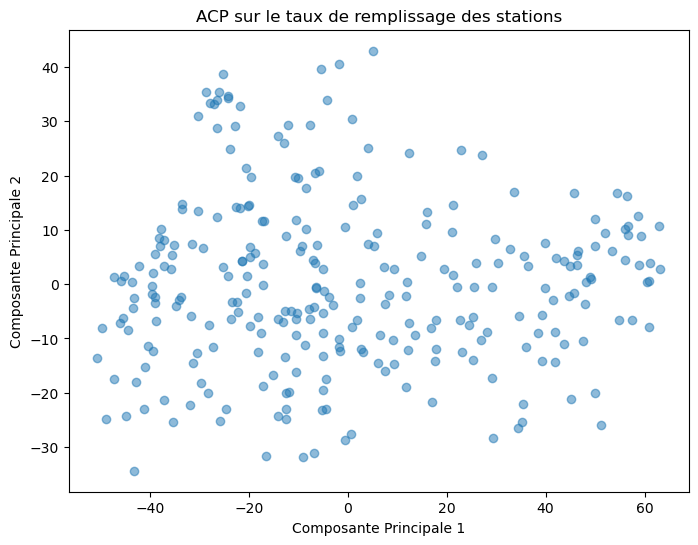

Variance expliquée par CP1 : 21.95%
Variance expliquée par CP2 : 5.64%


In [23]:
if "Heures" in xhour_paris.columns:
    df = xhour_paris.drop(columns=["Heures"])

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Appliquer l'ACP
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_scaled.T)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("ACP sur le taux de remplissage des stations")
plt.show()

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par CP1 : {explained_variance[0]*100:.2f}%")
print(f"Variance expliquée par CP2 : {explained_variance[1]*100:.2f}%")

In [24]:
xhour_paris_test = xhour_paris.copy()
xhour_paris_test.head()

,Heures,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice,jour
0,1,0.05,0.6875,0.5,0.214286,0.823529,0.095238,0.000000,0.875,0.0,...,0.05,0.566667,0.283560,0.68,0.76,0.714286,1.0,0.604167,1.0,1
1,2,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.000000,0.500,0.0,...,0.05,0.533333,0.272727,0.72,0.72,0.714286,1.0,0.604167,1.0,1
2,3,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.076923,0.500,0.0,...,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0,1
3,4,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0,1
4,5,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0,1


In [25]:
xhour_paris_test = xhour_paris_test.drop(columns=['Heures'])

In [26]:
for station in xhour_paris.columns[1:] :
    vecteur_station = xhour_paris[station].apply(np.array)
    mean = xhour_paris[station].mean()
    std = xhour_paris[station].std()
    vecteur_normalised = vecteur_station.apply(lambda x: (x - mean)/std)
    xhour_paris_test[station] = vecteur_normalised

In [27]:
matrice_cov_hour = xhour_paris_test.cov()

In [28]:
matrice_cov_hour = matrice_cov_hour.values
print(matrice_cov_hour)

[[ 1.          0.0303429   0.08369263 ... -0.06738573  0.07718876
   0.15899488]
 [ 0.0303429   1.          0.64826232 ...  0.12394867 -0.41550422
  -0.0464609 ]
 [ 0.08369263  0.64826232  1.         ...  0.1551639  -0.45924438
  -0.04867569]
 ...
 [-0.06738573  0.12394867  0.1551639  ...  1.         -0.04693523
  -0.12073529]
 [ 0.07718876 -0.41550422 -0.45924438 ... -0.04693523  1.
  -0.02696697]
 [ 0.15899488 -0.0464609  -0.04867569 ... -0.12073529 -0.02696697
   1.        ]]


In [29]:
X_test = xhour_paris.copy()
X_test = X_test.drop(columns=['Heures'])
Matrice_X =X_test.values

In [30]:
X_mean = np.mean(Matrice_X, axis=0)
X_std = np.std(Matrice_X, axis=0, ddof=1)  
X_standardized = (Matrice_X - X_mean) / X_std
Cov_X = np.cov(X_standardized , rowvar=False)

In [31]:
Cov_X

array([[ 1.        ,  0.0303429 ,  0.08369263, ..., -0.06738573,
         0.07718876,  0.15899488],
       [ 0.0303429 ,  1.        ,  0.64826232, ...,  0.12394867,
        -0.41550422, -0.0464609 ],
       [ 0.08369263,  0.64826232,  1.        , ...,  0.1551639 ,
        -0.45924438, -0.04867569],
       ...,
       [-0.06738573,  0.12394867,  0.1551639 , ...,  1.        ,
        -0.04693523, -0.12073529],
       [ 0.07718876, -0.41550422, -0.45924438, ..., -0.04693523,
         1.        , -0.02696697],
       [ 0.15899488, -0.0464609 , -0.04867569, ..., -0.12073529,
        -0.02696697,  1.        ]])

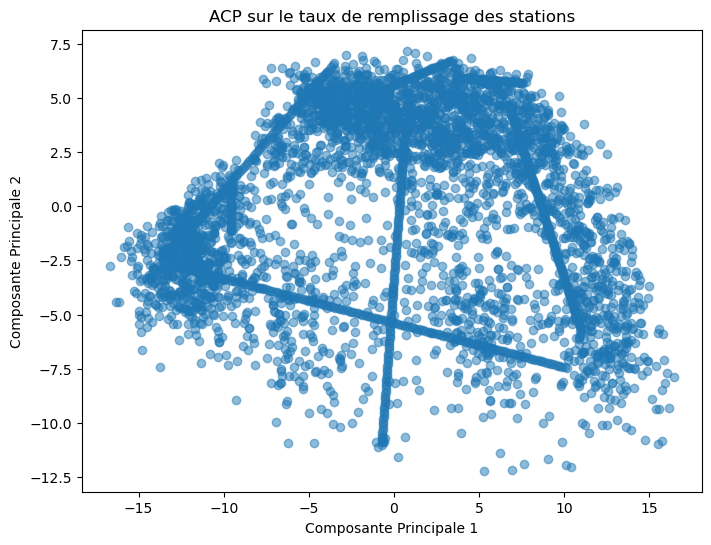

Variance expliquée par CP1 : 21.95%
Variance expliquée par CP2 : 5.64%


In [32]:
# On commence l'ACP
eigenvalues, eigenvectors = np.linalg.eigh(Cov_X)

# Trier par ordre décroissant des valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2 
top_eigenvectors = eigenvectors[:, :k]
scores = X_standardized @ top_eigenvectors
variance_expliquee = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)

plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("ACP sur le taux de remplissage des stations")
plt.show()

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par CP1 : {explained_variance[0]*100:.2f}%")
print(f"Variance expliquée par CP2 : {explained_variance[1]*100:.2f}%")

Essayons de faire l'ACP sur le Weekend et la Comparer Avec Weekdays :

In [33]:
print('Weekdays')

Weekdays


# ACP AVEC LE TABLEAU DE VECTEURS (JOURS)

In [34]:
stations = xjour_paris_normalisé.columns[1:]

# Convertir chaque station en une matrice (jours x 24 heures)
matrices_stations = {
    station: np.vstack(xjour_paris_normalisé[station].values)
    for station in stations
}

In [35]:
for station in xjour_paris_normalisé.columns[1:]:
    xjour_paris_normalisé[station] = xjour_paris_normalisé[station].apply(np.array)
stations = xjour_paris_normalisé.columns[1:]

# Créer un dictionnaire de matrices (jours x 24 heures) pour chaque station
matrices_stations = {}
for station in stations:
    # Convertir les vecteurs en une matrice 2D (jours x heures)
    matrices_stations[station] = np.vstack(xjour_paris_normalisé[station].values)
    

In [36]:
stat1 = xjour_paris_normalisé['00906-gare-de-lest'].values
result = np.dot(stat1,stat1)/185

In [37]:
def produit_scalaire_colonnes(df, colonne1, colonne2):
    somme = 0
    for index in range(len(df)):
        vecteur1 = df.at[index, colonne1]
        vecteur2 = df.at[index, colonne2]
        produit = np.dot(vecteur1, vecteur2)
        somme += produit
    
    return somme/185/24

In [38]:
xjour_paris_normalisé.at[0,'00906-gare-de-lest']

array([-0.56189773, -0.74508537, -0.71042988, -0.7020923 , -0.70876154,
       -0.75951293, -0.88644039, -1.11532449, -0.64495035, -0.67765841,
       -0.7383109 , -0.28953358, -0.68333462, -0.048091  , -0.20946728,
       -0.53615141, -0.53271679, -0.46159241,  1.28060889,  1.00788072,
        1.48106333,  1.033645  ,  0.35071555,  0.72645321])

In [39]:
def produit_scalaire_stations(df,colonne1,colonne2):
    somme = 0
    for i in range (len(df[colonne1])):
        vect1 = df.at[i,colonne1]
        vect2 = df.at[i,colonne2]
        somme += vect1 @ vect2
    return somme/185/24

In [40]:
testtest = produit_scalaire_stations(xjour_paris_normalisé,'00906-gare-de-lest','00906-gare-de-lest')
print(testtest)

1.0000000000000004


In [44]:
cov_matrix_jour = np.zeros((274, 274))
for i, stat_i in enumerate(xjour_paris_normalisé.columns[1:]):
    produit_scalaire = 0
    for j,stat_j in enumerate(xjour_paris_normalisé.columns[1:]):
        cov_matrix_jour[i,j] = produit_scalaire_stations(xjour_paris_normalisé,stat_i,stat_j)

In [45]:
eigenvalues_jours, eigenvectors_jours = np.linalg.eigh(cov_matrix_jour)

sorted_indices = np.argsort(eigenvalues_jours)[::-1]
eigenvalues_jours = eigenvalues_jours[sorted_indices]
eigenvectors_jours = eigenvectors_jours[:, sorted_indices]

In [46]:
k = 2  # Nombre de composantes à garder
top_eigenvectors = eigenvectors[:, :k]
scores_jours = xjour_paris_normalisé.columns[1:].values @ top_eigenvectors

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 275 is different from 274)

In [49]:
n_stations = 274
valeurs_propres, vecteurs_propres = np.linalg.eigh(cov_matrix_jour)

# Trier les valeurs propres et vecteurs propres par ordre décroissant
idx = valeurs_propres.argsort()[::-1]
valeurs_propres = valeurs_propres[idx]
vecteurs_propres = vecteurs_propres[:, idx]

# Calcul de la variance expliquée par chaque composante
variance_totale = np.sum(valeurs_propres)
variance_expliquee = [(val / variance_totale) * 100 for val in valeurs_propres]
variance_cumulee = np.cumsum(variance_expliquee)

# Afficher les résultats
print("\nLes 10 premières valeurs propres :")
print(valeurs_propres[:10])

print("\nPourcentage de variance expliquée par les 10 premières composantes :")
print([f"{v:.2f}%" for v in variance_expliquee[:10]])

print("\nPourcentage cumulé de variance expliquée :")
print([f"{v:.2f}%" for v in variance_cumulee[:10]])

# Calcul des composantes principales pour chaque station
# Nous utilisons les k premiers vecteurs propres (par exemple k=2)
k = 2
composantes_principales = np.zeros((n_stations, k))

for i in range(n_stations):
    station_i = f"Station_{i}"
    for j in range(k):
        # Projection sur le vecteur propre j
        composantes_principales[i, j] = sum(
            vecteurs_propres[s, j] * cov_matrix_jour[i, s] 
            for s in range(n_stations)
        )


Les 10 premières valeurs propres :
[41.23938049 18.55424259 11.57369349  8.58955412  6.60530203  6.29538427
  5.25960662  4.38842619  3.94062788  3.79217846]

Pourcentage de variance expliquée par les 10 premières composantes :
['15.05%', '6.77%', '4.22%', '3.13%', '2.41%', '2.30%', '1.92%', '1.60%', '1.44%', '1.38%']

Pourcentage cumulé de variance expliquée :
['15.05%', '21.82%', '26.05%', '29.18%', '31.59%', '33.89%', '35.81%', '37.41%', '38.85%', '40.23%']


In [50]:
df_test = xhour_paris.drop(columns='jour')

In [51]:
df_test.head()

,Heures,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42701-gide-le-kremlin-bicetre,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice
0,1,0.05,0.6875,0.5,0.214286,0.823529,0.095238,0.000000,0.875,0.0,...,0.066667,0.05,0.566667,0.283560,0.68,0.76,0.714286,1.0,0.604167,1.0
1,2,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.533333,0.272727,0.72,0.72,0.714286,1.0,0.604167,1.0
2,3,0.00,0.6875,0.2,0.214286,0.941176,0.095238,0.076923,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0
3,4,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0
4,5,0.00,0.6875,0.2,0.214286,1.000000,0.095238,0.000000,0.500,0.0,...,0.066667,0.05,0.500000,0.272727,0.76,0.80,0.714286,1.0,0.604167,1.0


In [52]:
df_test['jour'] = df_test['Heures'] // 24

In [53]:
df_test.head(25)

,Heures,00906-gare-de-lest,01001-ile-de-la-cite-pont-neuf,01007-etienne-marcel,01019-saint-honore-vendome,02004-reaumur-montorgueil,02012-quatre-septembre,05006-saint-jacques-soufflot,05009-square-viviani,05012-ulm-lhomond,...,42702-leclerc-kremlin-bicetre,42706-salengro-kremlin-bicetre,43001-paris-1-vincennes,43002-lagny-vincennes,43004-montreuil-vincennes,43006-minimes-vincennes,43007-vorges-vincennes,44101-place-mongolfier-saint-maurice,44102-verdun-saint-maurice,jour
0,1,0.050000,0.687500,0.500000,0.214286,0.823529,0.095238,0.000000,0.875000,0.000000,...,0.050000,0.566667,0.283560,0.680000,0.760000,0.714286,1.000000,0.604167,1.000000,0
1,2,0.000000,0.687500,0.200000,0.214286,0.941176,0.095238,0.000000,0.500000,0.000000,...,0.050000,0.533333,0.272727,0.720000,0.720000,0.714286,1.000000,0.604167,1.000000,0
2,3,0.000000,0.687500,0.200000,0.214286,0.941176,0.095238,0.076923,0.500000,0.000000,...,0.050000,0.500000,0.272727,0.760000,0.800000,0.714286,1.000000,0.604167,1.000000,0
3,4,0.000000,0.687500,0.200000,0.214286,1.000000,0.095238,0.000000,0.500000,0.000000,...,0.050000,0.500000,0.272727,0.760000,0.800000,0.714286,1.000000,0.604167,1.000000,0
4,5,0.000000,0.687500,0.200000,0.214286,1.000000,0.095238,0.000000,0.500000,0.000000,...,0.050000,0.500000,0.272727,0.760000,0.800000,0.714286,1.000000,0.604167,1.000000,0
5,6,0.000000,0.687500,0.200000,0.214286,1.000000,0.095238,0.000000,0.500000,0.000000,...,0.050000,0.466667,0.272727,0.720000,0.800000,0.714286,1.000000,0.604167,1.000000,0
6,7,0.000000,0.687500,0.300000,0.285714,1.000000,0.095238,0.000000,0.562500,0.000000,...,0.050000,0.466667,0.272727,0.720000,0.760000,0.714286,1.000000,0.604167,1.000000,0
7,8,0.014334,0.812500,0.292619,0.357143,1.000000,0.095238,0.000000,0.600901,0.066667,...,0.000000,0.466667,0.227273,0.719376,0.640000,0.714286,0.960000,0.604167,0.927408,0
8,9,0.097026,0.937500,0.271821,0.357143,0.933029,0.295699,0.769231,0.750000,0.133333,...,0.049130,0.366667,0.063561,0.775841,0.541057,0.655833,0.880000,0.604167,0.840000,0
9,10,0.029539,0.974095,0.800000,0.928571,0.695149,0.762842,0.758841,0.829037,0.133333,...,0.100000,0.066667,0.188912,1.000000,0.360000,0.659559,0.639749,0.642568,0.840000,0


In [54]:
df_test['day_of_week'] = df_test['jour'] % 7

In [55]:
df_test['day_type'] = np.where(df_test['day_of_week'] < 5, 'weekday', 'weekend')

In [56]:
station_columns = df_test.columns.drop(['Heures', 'jour', 'day_of_week', 'day_type'])
X = df_test[station_columns]

# Standardisation (moyenne=0, écart-type=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [57]:
pca = PCA(n_components=2)
scores_test = pca.fit_transform(X_std)

# Créer un DataFrame pour les résultats
df_pca = pd.DataFrame(scores_test, columns=['PC1', 'PC2'])
df_pca['day_type'] = df_test['day_type']

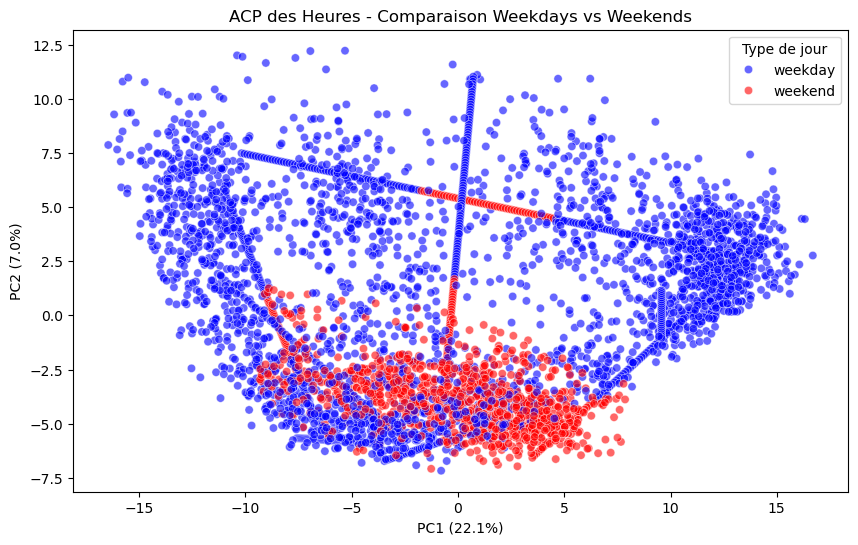

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='day_type',
    palette={'weekday': 'blue', 'weekend': 'red'},
    alpha=0.6
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("ACP des Heures - Comparaison Weekdays vs Weekends")
plt.legend(title='Type de jour')
plt.show()

In [59]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=station_columns)

# Stations les plus influentes sur PC1
print("Top 5 Stations - PC1 :\n", loadings['PC1'].abs().sort_values(ascending=False).head(5))

# Stations les plus influentes sur PC2
print("\nTop 5 Stations - PC2 :\n", loadings['PC2'].abs().sort_values(ascending=False).head(5))

Top 5 Stations - PC1 :
 09039-chaussee-dantin           0.109784
15039-charles-vallin            0.108104
02012-quatre-septembre          0.107918
01019-saint-honore-vendome      0.107628
15038-place-adolphe-cherioux    0.106032
Name: PC1, dtype: float64

Top 5 Stations - PC2 :
 13041-porte-divry            0.170737
20115-porte-de-bagnolet      0.157348
14018-porte-dorleans         0.155940
20106-mairie-du-20eme        0.152403
20111-lisle-adam-pyrenees    0.140908
Name: PC2, dtype: float64
